In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

## NIH Summary table

In [2]:
NIH_sex = pd.read_csv("./NIH/results/WantX.csv")

In [3]:
NIH_sex

,Unnamed: 0,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
0,9,Mass,M,0.004197,0.521127,0.002099,0.014380,0.478873,-0.002099,0.014380
1,6,Fibrosis,Fb,0.006531,0.495238,0.003266,0.063333,0.504762,-0.003266,0.063333
2,4,Effusion,Ef,0.036070,0.507937,0.018035,0.026360,0.492063,-0.018035,0.026360
3,8,Infiltration,In,0.089760,0.556522,-0.044880,0.009680,0.443478,0.044880,0.009680
4,13,Pneumothorax,Px,0.122360,0.549669,-0.061180,0.043144,0.450331,0.061180,0.043144
5,10,Nodule,N,0.145922,0.543767,0.072961,0.025246,0.456233,-0.072961,0.025246
6,12,Pneumonia,Pa,0.189961,0.430769,0.094981,0.046050,0.569231,-0.094981,0.046050
7,5,Emphysema,Em,0.216484,0.617647,0.108242,0.066803,0.382353,-0.108242,0.066803
8,11,Pleural_Thickening,PT,0.263636,0.574586,-0.131818,0.019445,0.425414,0.131818,0.019445
9,0,Atelectasis,At,0.272667,0.609145,0.136333,0.015259,0.390855,-0.136333,0.015259


In [4]:
print("Average Distance:",round(NIH_sex["Distance"].mean(),3))
print("Count female with negative gap:",len(NIH_sex.loc[(NIH_sex.Gap_F_mean < 0)]))
print("Count male with negative gap  :",len(NIH_sex.loc[(NIH_sex.Gap_M_mean < 0)]))

Average Distance: 0.212
Count female with negative gap: 8
Count male with negative gap  : 6


In [5]:
def func(x, m, b):
    return m*x + b

In [44]:
diseases_abbr_NIH = {'Atelectasis': 'At',
                'Cardiomegaly': 'Cd',
                'Effusion': 'Ef',
                'Infiltration': 'In',
                'Mass': 'M',
                'Nodule': 'N',
                'Pneumonia': 'Pa',
                'Pneumothorax': 'Px',
                'Consolidation': 'Co',
                'Edema': 'Ed',
                'Emphysema': 'Em',
                'Fibrosis': 'Fb',
                'Pleural_Thickening': 'PT',
                'Hernia': 'H'
                }
print(len(diseases_abbr_NIH))

14


NIH curvefit parameters [ 0.56453362 -0.2426992 ]


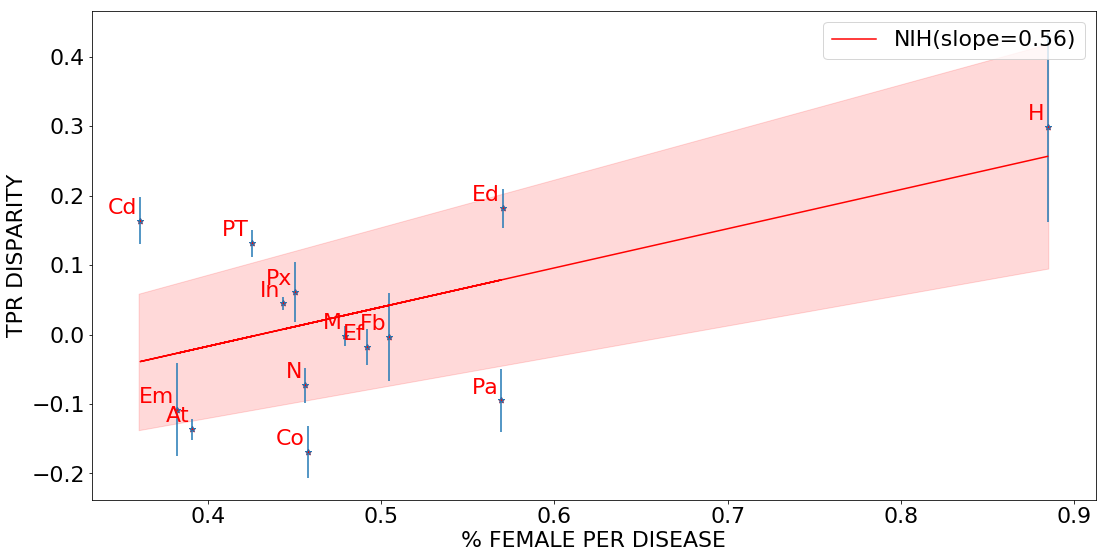

In [7]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(18,9))

  

params_NIH, covar = curve_fit(func, NIH_sex['%F'],NIH_sex['Gap_F_mean'], sigma=NIH_sex['CI_F'], absolute_sigma=True)
plt.plot(NIH_sex['%F'], func(NIH_sex['%F'], params_NIH[0], params_NIH[1]), color='red', label='NIH(slope=0.56)' )
plt.legend()   





 #label='NIH'
plt.scatter(NIH_sex['%F'],NIH_sex['Gap_F_mean'], marker='*',color='red', label='NIH')
plt.errorbar(NIH_sex['%F'],NIH_sex['Gap_F_mean'],yerr = NIH_sex['CI_F'],fmt='*',mfc='red')

for d, x, y in zip( NIH_sex['diseases'], NIH_sex['%F'], NIH_sex['Gap_F_mean']):
    plt.annotate(diseases_abbr_NIH[d], color='red', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')


diseases_NIH = np.array(len(diseases_abbr_NIH))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.36, 0.885, 100)    
bound_upper = func(hires_x, *(params_NIH + sigma_ab))
bound_lower = func(hires_x, *(params_NIH - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'red', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")
#plt.legend('NIH (slope=' + str(round(params_NIH[0], 2)) + ')')   

print("NIH curvefit parameters",params_NIH)

NIH curvefit parameters [ 0.56453362 -0.2426992 ]


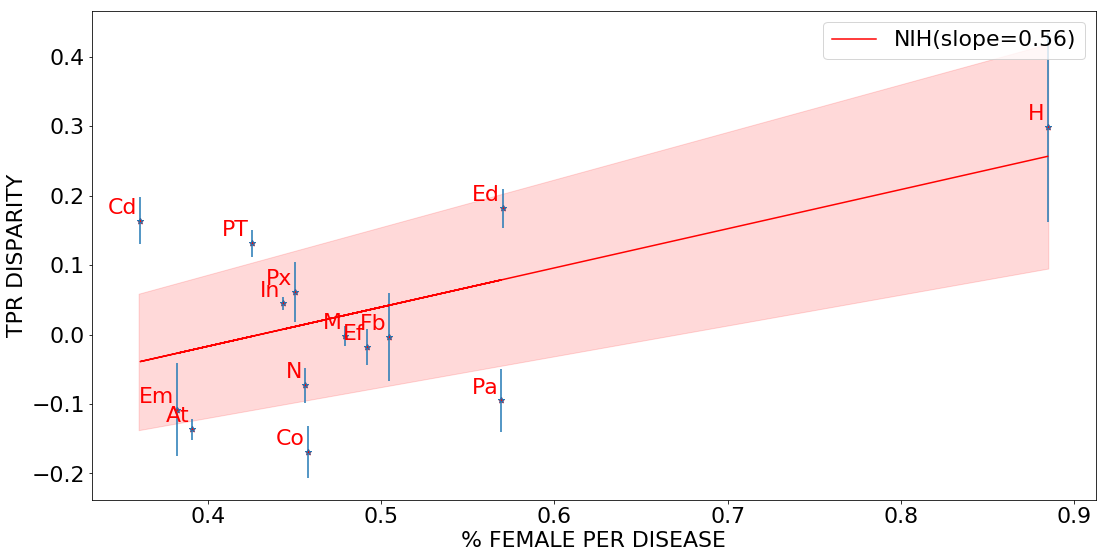

In [8]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(18,9))

  

params_NIH, covar = curve_fit(func, NIH_sex['%F'],NIH_sex['Gap_F_mean'], sigma=NIH_sex['CI_F'], absolute_sigma=True)
plt.plot(NIH_sex['%F'], func(NIH_sex['%F'], params_NIH[0], params_NIH[1]), color='red', label='NIH(slope=0.56)' )
plt.legend()   





 #label='NIH'
plt.scatter(NIH_sex['%F'],NIH_sex['Gap_F_mean'], marker='*',color='red', label='NIH')
plt.errorbar(NIH_sex['%F'],NIH_sex['Gap_F_mean'],yerr = NIH_sex['CI_F'],fmt='*',mfc='red')

for d, x, y in zip( NIH_sex['diseases'], NIH_sex['%F'], NIH_sex['Gap_F_mean']):
    plt.annotate(diseases_abbr_NIH[d], color='red', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')


diseases_NIH = np.array(len(diseases_abbr_NIH))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.36, 0.885, 100)    
bound_upper = func(hires_x, *(params_NIH + sigma_ab))
bound_lower = func(hires_x, *(params_NIH - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'red', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")
#plt.legend('NIH (slope=' + str(round(params_NIH[0], 2)) + ')')   

print("NIH curvefit parameters",params_NIH)

## CXR Summary table 

In [9]:
CXP_sex = pd.read_csv("./CXP/results/WantX.csv")

In [10]:
CXP_sex

,Unnamed: 0,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
0,5,Fracture,Fr,0.004391,0.710805,0.002196,0.027353,0.289195,-0.002196,0.027353
1,3,Edema,Ed,0.004968,0.565633,-0.002484,0.010979,0.434367,0.002484,0.010979
2,13,Support Devices,SD,0.015269,0.592547,-0.007635,0.004496,0.407453,0.007635,0.004496
3,6,Lung Lesion,LL,0.033171,0.553452,0.016585,0.014672,0.446548,-0.016585,0.014672
4,0,Atelectasis,A,0.038064,0.599397,0.019032,0.014193,0.400603,-0.019032,0.014193
5,7,Lung Opacity,AO,0.042074,0.592607,-0.021037,0.006627,0.407393,0.021037,0.006627
6,11,Pneumonia,Pa,0.051053,0.581699,0.025527,0.030960,0.418301,-0.025527,0.030960
7,9,Pleural Effusion,Ef,0.054786,0.583002,-0.027393,0.009462,0.416998,0.027393,0.009462
8,12,Pneumothorax,Px,0.057944,0.647822,0.028972,0.020186,0.352178,-0.028972,0.020186
9,10,Pleural Other,PO,0.091218,0.721154,0.045609,0.022675,0.278846,-0.045609,0.022675


In [11]:
print("Average Distance:",round(CXP_sex["Distance"].mean(),3))
print("Count female with negative gap:",len(CXP_sex.loc[(CXP_sex.Gap_F_mean < 0)]))
print("Count male with negative gap  :",len(CXP_sex.loc[(CXP_sex.Gap_M_mean < 0)])-1) # -1 is to exclude No Finding as it is not a disease

Average Distance: 0.065
Count female with negative gap: 8
Count male with negative gap  : 5


In [45]:
    diseases_abbr_CXP = {'Lung Opacity': 'AO',
                'Cardiomegaly': 'Cd',
                'Effusion': 'Ef',
                'Enlarged Cardiomediastinum': 'EC',
                'Lung Lesion': 'LL',
                'Atelectasis': 'A',
                'Pneumonia': 'Pa',
                'Pneumothorax': 'Px',
                'Consolidation': 'Co',
                'Edema': 'Ed',
                'Pleural Effusion': 'Ef',
                'Pleural Other': 'PO',
                'Fracture': 'Fr',
                'Support Devices': 'SD',
                'Airspace Opacity': 'AO',
                'No Finding': 'NF'
                }

CXP curvefit parameters [ 0.65722983 -0.25027901]


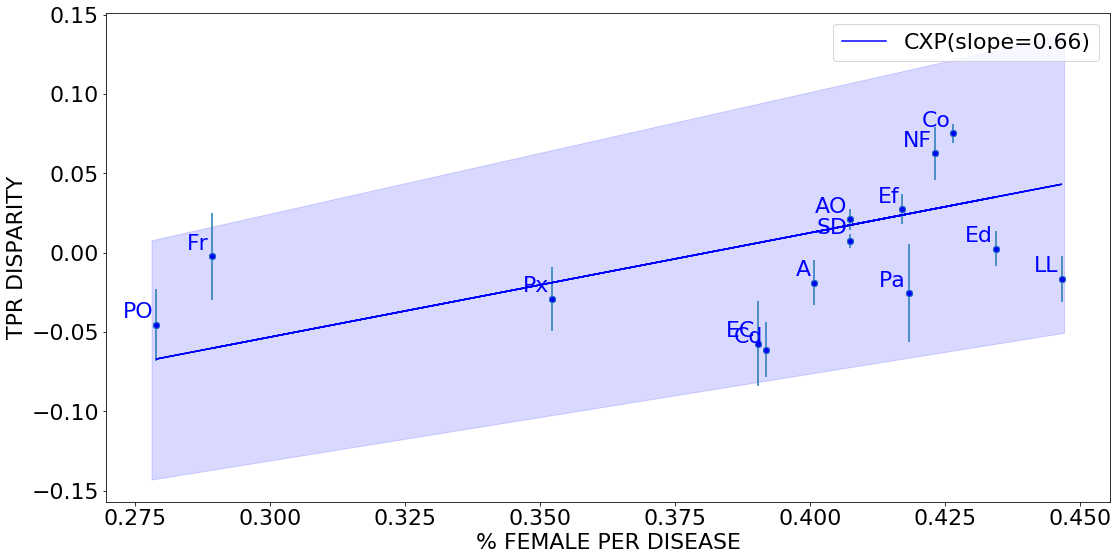

In [13]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(18,9))

  

params_CXP, covar = curve_fit(func, CXP_sex['%F'], CXP_sex['Gap_F_mean'], sigma=CXP_sex['CI_F'], absolute_sigma=True)
plt.plot(CXP_sex['%F'], func(CXP_sex['%F'], params_CXP[0], params_CXP[1]), color='blue', label='CXP(slope=0.66)' )
plt.legend()   





plt.scatter(CXP_sex['%F'],CXP_sex['Gap_F_mean'], marker='o',color='blue', label='CXP')
plt.errorbar(CXP_sex['%F'],CXP_sex['Gap_F_mean'],yerr = CXP_sex['CI_F'],fmt='o',mfc='blue')

for d, x, y in zip(CXP_sex['diseases'], CXP_sex['%F'], CXP_sex['Gap_F_mean']):
    plt.annotate(diseases_abbr_CXP[d], color='blue', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')


diseases_CXP = np.array(len(diseases_abbr_CXP))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.278, 0.447, 100)    
bound_upper = func(hires_x, *(params_CXP + sigma_ab))
bound_lower = func(hires_x, *(params_CXP - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'blue', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")
#plt.legend('NIH (slope=' + str(round(params_NIH[0], 2)) + ')')   

print("CXP curvefit parameters",params_CXP)

## CXP Summary table 

In [14]:
MIMIC_sex = pd.read_csv("./MIMIC/results/WantX.csv")

In [15]:
MIMIC_sex

,Unnamed: 0,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
0,12,Pneumothorax,Px,0.009846,0.666059,0.004923,0.012121,0.333941,-0.004923,0.012121
1,1,Atelectasis,A,0.024203,0.606853,-0.012102,0.005913,0.393147,0.012102,0.005913
2,10,Pleural Other,PO,0.038137,0.653470,0.019068,0.033292,0.346530,-0.019068,0.033292
3,4,Edema,Ed,0.039230,0.565422,0.019615,0.017503,0.434578,-0.019615,0.017503
4,2,Cardiomegaly,Cd,0.060402,0.591884,0.030201,0.012910,0.408116,-0.030201,0.012910
5,3,Consolidation,Co,0.092534,0.630431,0.046267,0.020875,0.369569,-0.046267,0.020875
6,7,Lung Lesion,LL,0.096148,0.570966,-0.048074,0.010843,0.429034,0.048074,0.010843
7,11,Pneumonia,Pa,0.116269,0.591778,0.058135,0.009779,0.408222,-0.058135,0.009779
8,0,Airspace Opacity,AO,0.131566,0.620550,0.065783,0.009830,0.379450,-0.065783,0.009830
9,6,Fracture,Fr,0.151015,0.663341,0.075508,0.005284,0.336659,-0.075508,0.005284


In [16]:
print("Average Distance:",round(CXR_sex["Distance"].mean(),5))
print("Count female with negative gap:",len(CXR_sex.loc[(CXR_sex.Gap_F_mean < 0)]))
print("Count male with negative gap  :",len(CXR_sex.loc[(CXR_sex.Gap_M_mean < 0)])-1) # -1 is to exclude No Finding as it is not a disease

NameError: name 'CXR_sex' is not defined

In [17]:
MIMIC_Age = pd.read_csv("./MIMIC/results/WantAge.csv")
MIMIC_Age

,Unnamed: 0,diseases,diseases_abbr,Distance,%40-60,Gap_40-60_mean,CI_40-60,%60-80,Gap_60-80_mean,CI_60-80,%20-40,Gap_20-40_mean,CI_20-40,%80-,Gap_80-_mean,CI_80-,%0-20,Gap_0-20_mean,CI_0-20
0,11,Pneumonia,Pa,0.041292,0.361946,0.033856,0.008105,0.432876,-0.007237,0.004780,0.137930,-0.000346,0.014303,0.057009,0.013524,0.016175,0.010239,-0.007437,0.012200
1,3,Consolidation,Co,0.060793,0.373009,-0.037692,0.014253,0.417091,0.020608,0.022765,0.147885,0.023101,0.017318,0.059084,-0.035072,0.027494,0.002930,0.006208,0.011352
2,7,Lung Lesion,LL,0.103107,0.390668,0.049943,0.011265,0.451069,0.056308,0.013530,0.095399,-0.009089,0.010978,0.042320,-0.022398,0.025882,0.020544,-0.046799,0.031890
3,10,Pleural Other,PO,0.140221,0.475710,0.040339,0.022999,0.430915,0.057070,0.009769,0.029653,-0.083152,0.027674,0.063722,-0.032499,0.012166,0.000000,NaN,NaN
4,6,Fracture,Fr,0.159223,0.449838,0.008510,0.011827,0.382596,-0.023519,0.015593,0.087199,-0.071663,0.011975,0.074524,0.005404,0.006730,0.005843,0.087560,0.048868
5,0,Airspace Opacity,AO,0.234915,0.365191,-0.004275,0.005314,0.407036,0.086238,0.010675,0.153501,-0.005651,0.007278,0.065364,0.117079,0.014440,0.008908,-0.117837,0.045060
6,5,Enlarged Cardiomediastinum,EC,0.245930,0.350427,-0.051581,0.013155,0.451013,0.035458,0.013157,0.142691,-0.004856,0.009507,0.045996,-0.015152,0.014285,0.009873,0.194349,0.038536
7,13,Support Devices,SD,0.324972,0.328215,-0.104202,0.003600,0.395573,0.000000,0.000000,0.221167,0.123596,0.006338,0.049585,0.083244,0.006293,0.005461,-0.201376,0.022081
8,1,Atelectasis,A,0.367683,0.335617,0.000000,0.000000,0.478818,0.161049,0.007265,0.130088,-0.054530,0.015977,0.050486,0.135417,0.024334,0.004991,-0.206634,0.029310
9,12,Pneumothorax,Px,0.369644,0.318104,0.000000,0.000000,0.363791,-0.081653,0.011814,0.242963,0.164852,0.026414,0.056234,-0.166011,0.016263,0.018907,0.203632,0.066186


In [18]:
print("Average Distance:",round(CXR_sex["Distance"].mean(),5))
print("Count female with negative gap:",len(CXR_sex.loc[(CXR_sex.Gap_4060_mean < 0)]))
print("Count male with negative gap  :",len(CXR_sex.loc[(CXR_sex.Gap_M_mean < 0)])-1) # -1 is to exclude No Finding as it is not a disease

NameError: name 'CXR_sex' is not defined

In [46]:
    diseases_abbr_CXR = {'Airspace Opacity': 'AO',
                'Cardiomegaly': 'Cd',
                'Pleural Effusion': 'Ef',
                'Enlarged Cardiomediastinum': 'EC',
                'Lung Lesion': 'LL',
                'Atelectasis': 'A',
                'Pneumonia': 'Pa',
                'Pneumothorax': 'Px',
                'Consolidation': 'Co',
                'Edema': 'Ed',
                'Pleural Effusion': 'Ef',
                'Pleural Other': 'PO',
                'Fracture': 'Fr',
                'Support Devices': 'SD',
                'No Finding': 'NF'
                }

NameError: name 'CXR_sex' is not defined

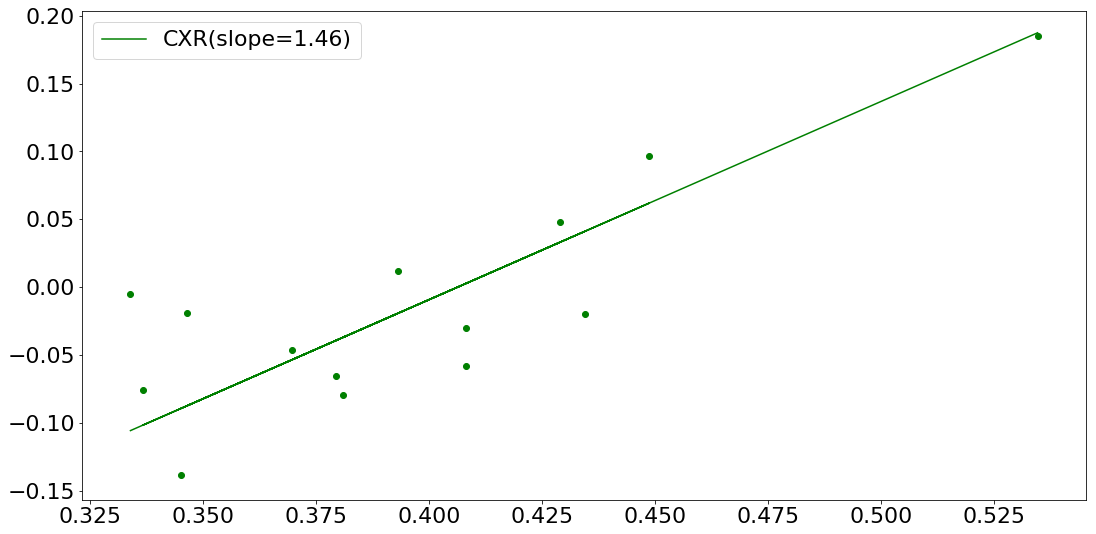

In [20]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(18,9))

  

params_CXR, covar = curve_fit(func, MIMIC_sex['%F'], MIMIC_sex['Gap_F_mean'], sigma=MIMIC_sex['CI_F'], absolute_sigma=True)
plt.plot(MIMIC_sex['%F'], func(MIMIC_sex['%F'], params_CXR[0], params_CXR[1]), color='green', label='CXR(slope=1.46)' )
plt.legend()   





plt.scatter(MIMIC_sex['%F'],MIMIC_sex['Gap_F_mean'], marker='o',color='green', label='CXR')
plt.errorbar(CXR_sex['%F'],CXR_sex['Gap_F_mean'],yerr = CXR_sex['CI_F'],fmt='o',mfc='green')

for d, x, y in zip(MIMIC_sex['diseases'], MIMIC_sex['%F'], MIMIC_sex['Gap_F_mean']):
    plt.annotate(diseases_abbr_CXR[d], color='green', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
    


diseases_CXR = np.array(len(diseases_abbr_CXR))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.333, 0.536, 100)    
bound_upper = func(hires_x, *(params_CXR + sigma_ab))
bound_lower = func(hires_x, *(params_CXR - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'green', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")
#plt.legend('NIH (slope=' + str(round(params_NIH[0], 2)) + ')')   

print("CXP curvefit parameters",params_CXR)

## CXR Summary table 

CXR curvefit parameters [ 1.46043877 -0.59341967]
CXP curvefit parameters [ 0.65722983 -0.25027901]
NIH curvefit parameters [ 0.56453362 -0.2426992 ]


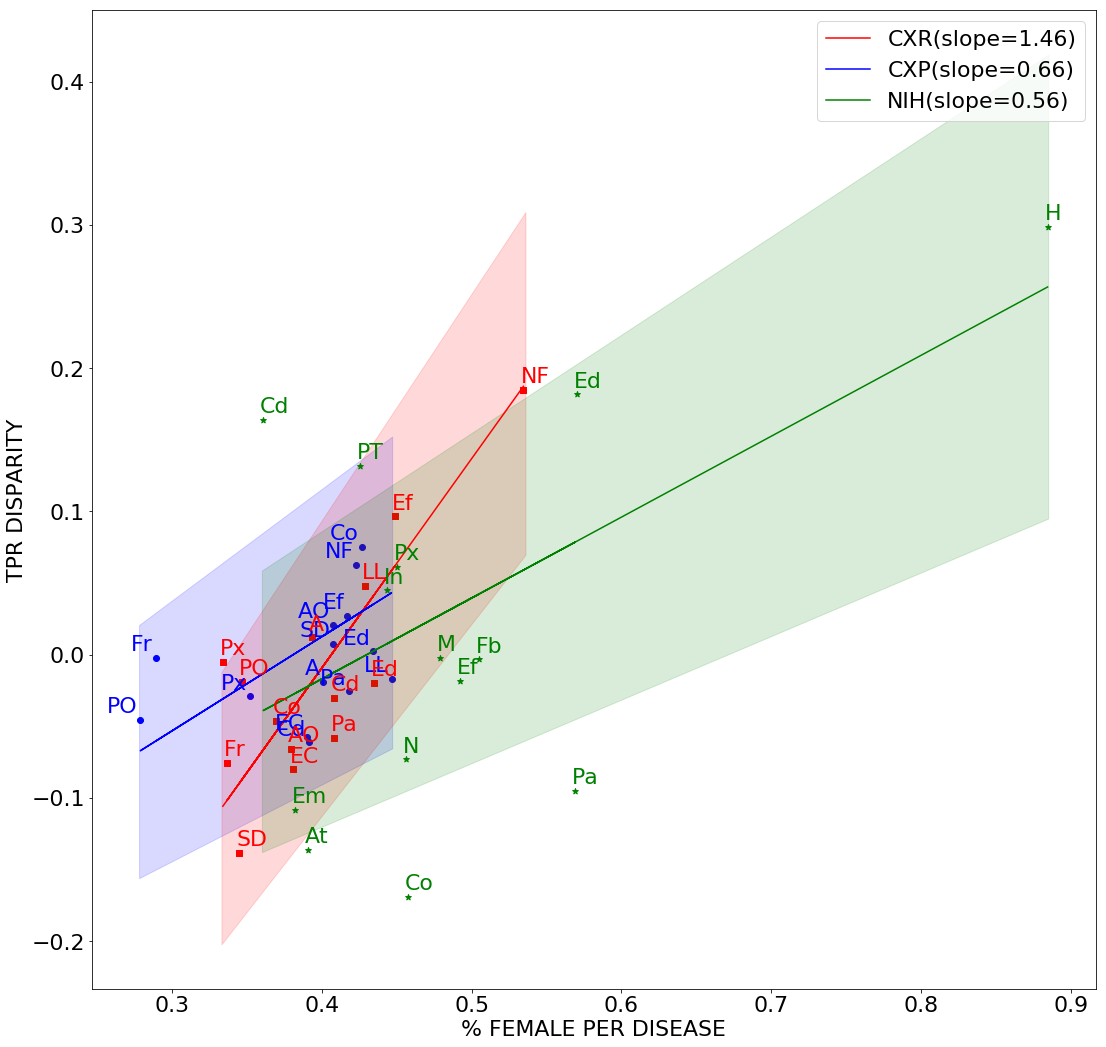

In [48]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(18,18))

params_CXR, covar = curve_fit(func, MIMIC_sex['%F'], MIMIC_sex['Gap_F_mean'], sigma=MIMIC_sex['CI_F'], absolute_sigma=True)
plt.plot(MIMIC_sex['%F'], func(MIMIC_sex['%F'], params_CXR[0], params_CXR[1]), color='red', label='CXR(slope=1.46)' )
plt.legend()   

params_CXP, covar = curve_fit(func, CXP_sex['%F'], CXP_sex['Gap_F_mean'], sigma=CXP_sex['CI_F'], absolute_sigma=True)
plt.plot(CXP_sex['%F'], func(CXP_sex['%F'], params_CXP[0], params_CXP[1]), color='blue', label='CXP(slope=0.66)' )
plt.legend()   

params_NIH, covar = curve_fit(func, NIH_sex['%F'],NIH_sex['Gap_F_mean'], sigma=NIH_sex['CI_F'], absolute_sigma=True)
plt.plot(NIH_sex['%F'], func(NIH_sex['%F'], params_NIH[0], params_NIH[1]), color='green', label='NIH(slope=0.56)' )
plt.legend()   

#------------------- CXP
plt.scatter(CXP_sex['%F'],CXP_sex['Gap_F_mean'], marker='o',color='blue', label='CXP')
#plt.errorbar(CXP_sex['%F'],CXP_sex['Gap_F_mean'],yerr = CXP_sex['CI_F'],fmt='o',mfc='blue')

for d, x, y in zip(CXP_sex['diseases'], CXP_sex['%F'], CXP_sex['Gap_F_mean']):
    plt.annotate(diseases_abbr_CXP[d], color='blue', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')

diseases_CXP = np.array(len(diseases_abbr_CXP))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.278, 0.447, 100)    
bound_upper = func(hires_x, *(params_CXP + sigma_ab))
bound_lower = func(hires_x, *(params_CXP - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'blue', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")

#--------------------------------------------- MIMIC 
plt.scatter(MIMIC_sex['%F'],MIMIC_sex['Gap_F_mean'], marker='s',color='red', label='CXR')
#plt.errorbar(CXR_sex['%F'],CXR_sex['Gap_F_mean'],yerr = CXR_sex['CI_F'],fmt='o',mfc='green')

for d, x, y in zip(MIMIC_sex['diseases'], MIMIC_sex['%F'], MIMIC_sex['Gap_F_mean']):
     plt.annotate(diseases_abbr_CXR[d], color='red', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='left', va='bottom')
    


diseases_CXR = np.array(len(diseases_abbr_CXR))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.333, 0.536, 100)    
bound_upper = func(hires_x, *(params_CXR + sigma_ab))
bound_lower = func(hires_x, *(params_CXR - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'red', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")
#plt.legend('NIH (slope=' + str(round(params_NIH[0], 2)) + ')')   




#--------------------------------------- 'NIH'
plt.scatter(NIH_sex['%F'],NIH_sex['Gap_F_mean'], marker='*',color='green', label='NIH')
#plt.errorbar(NIH_sex['%F'],NIH_sex['Gap_F_mean'],yerr = NIH_sex['CI_F'],fmt='*',mfc='red')

for d, x, y in zip( NIH_sex['diseases'], NIH_sex['%F'], NIH_sex['Gap_F_mean']):
    plt.annotate(diseases_abbr_NIH[d], color='green', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='left', va='bottom')


diseases_NIH = np.array(len(diseases_abbr_NIH))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.36, 0.885, 100)    
bound_upper = func(hires_x, *(params_NIH + sigma_ab))
bound_lower = func(hires_x, *(params_NIH - sigma_ab))
plt.fill_between(hires_x, bound_lower, bound_upper, color = 'green', alpha = 0.15)
#
    
plt.xlabel("% FEMALE PER DISEASE")
plt.ylabel("TPR DISPARITY")

print("CXR curvefit parameters",params_CXR)
print("CXP curvefit parameters",params_CXP)
print("NIH curvefit parameters",params_NIH)

CXR curvefit parameters [ 1.46043877 -0.59341967]
CXP curvefit parameters [ 0.65722983 -0.25027901]
NIH curvefit parameters [ 0.56453362 -0.2426992 ]


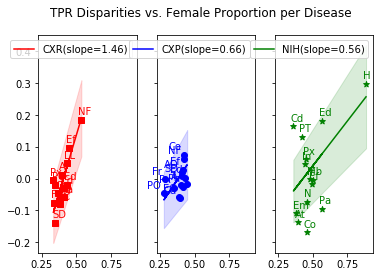

<Figure size 1296x1296 with 0 Axes>

In [50]:
plt.rcParams.update({'font.size': 10})


fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})

fig.suptitle('TPR Disparities vs. Female Proportion per Disease')

params_CXR, covar = curve_fit(func, MIMIC_sex['%F'], MIMIC_sex['Gap_F_mean'], sigma=MIMIC_sex['CI_F'], absolute_sigma=True)
ax1.plot(MIMIC_sex['%F'], func(MIMIC_sex['%F'], params_CXR[0], params_CXR[1]), color='red', label='CXR(slope=1.46)' )
ax1.legend()   

params_CXP, covar = curve_fit(func, CXP_sex['%F'], CXP_sex['Gap_F_mean'], sigma=CXP_sex['CI_F'], absolute_sigma=True)
ax2.plot(CXP_sex['%F'], func(CXP_sex['%F'], params_CXP[0], params_CXP[1]), color='blue', label='CXP(slope=0.66)' )
ax2.legend()   

params_NIH, covar = curve_fit(func, NIH_sex['%F'],NIH_sex['Gap_F_mean'], sigma=NIH_sex['CI_F'], absolute_sigma=True)
ax3.plot(NIH_sex['%F'], func(NIH_sex['%F'], params_NIH[0], params_NIH[1]), color='green', label='NIH(slope=0.56)' )
ax3.legend()   

#------------------- CXP
ax2.scatter(CXP_sex['%F'],CXP_sex['Gap_F_mean'], marker='o',color='blue', label='CXP')
#plt.errorbar(CXP_sex['%F'],CXP_sex['Gap_F_mean'],yerr = CXP_sex['CI_F'],fmt='o',mfc='blue')

for d, x, y in zip(CXP_sex['diseases'], CXP_sex['%F'], CXP_sex['Gap_F_mean']):
    ax2.annotate(diseases_abbr_CXP[d], color='blue', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')

diseases_CXP = np.array(len(diseases_abbr_CXP))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.278, 0.447, 100)    
bound_upper = func(hires_x, *(params_CXP + sigma_ab))
bound_lower = func(hires_x, *(params_CXP - sigma_ab))
ax2.fill_between(hires_x, bound_lower, bound_upper, color = 'blue', alpha = 0.15)
#
    
# ax2.xlabel("% FEMALE PER DISEASE")
# ax2.ylabel("TPR DISPARITY")

#--------------------------------------------- MIMIC 
ax1.scatter(MIMIC_sex['%F'],MIMIC_sex['Gap_F_mean'], marker='s',color='red', label='CXR')
#plt.errorbar(CXR_sex['%F'],CXR_sex['Gap_F_mean'],yerr = CXR_sex['CI_F'],fmt='o',mfc='green')

for d, x, y in zip(MIMIC_sex['diseases'], MIMIC_sex['%F'], MIMIC_sex['Gap_F_mean']):
      ax1.annotate(diseases_abbr_CXR[d], color='red', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='left', va='bottom')
    


diseases_CXR = np.array(len(diseases_abbr_CXR))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.333, 0.536, 100)    
bound_upper = func(hires_x, *(params_CXR + sigma_ab))
bound_lower = func(hires_x, *(params_CXR - sigma_ab))
ax1.fill_between(hires_x, bound_lower, bound_upper, color = 'red', alpha = 0.15)
#
    
# ax1.xlabel("% FEMALE PER DISEASE")
# ax1.ylabel("TPR DISPARITY")
#plt.legend('NIH (slope=' + str(round(params_NIH[0], 2)) + ')')   




#--------------------------------------- 'NIH'
ax3.scatter(NIH_sex['%F'],NIH_sex['Gap_F_mean'], marker='*',color='green', label='NIH')
#plt.errorbar(NIH_sex['%F'],NIH_sex['Gap_F_mean'],yerr = NIH_sex['CI_F'],fmt='*',mfc='red')

for d, x, y in zip( NIH_sex['diseases'], NIH_sex['%F'], NIH_sex['Gap_F_mean']):
    ax3.annotate(diseases_abbr_NIH[d], color='green', xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='left', va='bottom')


diseases_NIH = np.array(len(diseases_abbr_NIH))
sigma_ab = np.sqrt(np.diagonal(covar))   

# plotting the confidence intervals
hires_x = np.linspace(0.36, 0.885, 100)    
bound_upper = func(hires_x, *(params_NIH + sigma_ab))
bound_lower = func(hires_x, *(params_NIH - sigma_ab))
ax3.fill_between(hires_x, bound_lower, bound_upper, color = 'green', alpha = 0.15)
#
    
# ax3.xlabel("% FEMALE PER DISEASE")
# ax3.ylabel("TPR DISPARITY")
plt.figure(figsize=(18,18))
print("CXR curvefit parameters",params_CXR)
print("CXP curvefit parameters",params_CXP)
print("NIH curvefit parameters",params_NIH)